# EasyVisa Project

By:  Glen A. Patterson

Date:  06/12/2023

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* **case_id:** ID of each visa application
* **continent:** Information of continent the employee
* **education_of_employee:** Information of education of the employee
* **has_job_experience:** Does the employee has any job experience? Y= Yes; N = No
* **requires_job_training:** Does the employee require any job training? Y = Yes; N = No 
* **no_of_employees:** Number of employees in the employer's company
* **yr_of_estab:** Year in which the employer's company was established
* **region_of_employment:** Information of foreign worker's intended region of employment in the US.
* **prevailing_wage:**  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* **unit_of_wage:** Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* **full_time_position:** Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* **case_status:**  Flag indicating if the Visa was certified or denied

# Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically
%load_ext nb_black

# Libraries to help read, save, and manipulate data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

sns.set()

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", None)

# To split the data into train and test
from sklearn.model_selection import train_test_split

# To build the Logistic regression_model
from sklearn.linear_model import LogisticRegression

# To check model performance
from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# To build and visualize the Decision Tree_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Hyperparameter Tuning of the Decision Tree to build a better model
from sklearn.model_selection import GridSearchCV

# To build the Bagging and RandomForest models
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# To build the boosting models AdaBoost, GradientBoosting, and Stacking
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

# To build the XGBoost model
from xgboost import XGBClassifier

<IPython.core.display.Javascript object>

# Data Overview

- Observations
- Sanity checks

In [2]:
# Load the csv file and call the dataframe "EasyVisa"
EasyVisa = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

In [3]:
# Make a copy of original dataframe "EasyVisa" and call it "data".  We will be modifying this dataframe
data = EasyVisa.copy()

<IPython.core.display.Javascript object>

In [4]:
# Observing the head of the first 10 rows of the dataset to make sure it loaded correctly and examine the data.
data.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


<IPython.core.display.Javascript object>

In [5]:
# Get information about the number of rows and columns in the dataset (rows, columns)
data.shape

(25480, 12)

<IPython.core.display.Javascript object>

- We can see that there is 25,480 rows and 12 columns

In [6]:
# See if there is any duplicated rows
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There is no duplicated rows in dataset.

In [7]:
# Information on dataset (data types, format, missing data, ect.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

- There is no missing data in this dataset
- There is 2.3MB memory used
- There is one "float64", two "int64", and nine "object" data types

In [8]:
# Explore the Statistics in data and look for outliers in dataset
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [9]:
# Checking all the number of employees in the employer's company that has value less than or equal to zero.
data[data["no_of_employees"] <= 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


<IPython.core.display.Javascript object>

- **We will group all the negitive employees the employer has in the company to just zero. (A startup company)**

In [10]:
# Converting the number of employees in the employer's company that has value less than zero to just zero. (Startup Company)
for idx, row in data.iterrows():
    if data.loc[idx, "no_of_employees"] <= 0:
        data.loc[idx, "no_of_employees"] = 0

<IPython.core.display.Javascript object>

In [11]:
# Check the different types of values entered in dataset and there value counts
print(data.continent.value_counts())
print(data.education_of_employee.value_counts())
print(data.has_job_experience.value_counts())
print(data.requires_job_training.value_counts())
print(data.region_of_employment.value_counts())
print(data.unit_of_wage.value_counts())
print(data.full_time_position.value_counts())
print(data.case_status.value_counts())

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Y    14802
N    10678
Name: has_job_experience, dtype: int64
N    22525
Y     2955
Name: requires_job_training, dtype: int64
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
Y    22773
N     2707
Name: full_time_position, dtype: int64
Certified    17018
Denied        8462
Name: case_status, dtype: int64


<IPython.core.display.Javascript object>

In [12]:
# Drop case_id from the dataset as it will not be needed for modeling
data = data.drop(columns="case_id")

<IPython.core.display.Javascript object>

In [13]:
# Information on dataset (data types, format, missing data, ect.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


<IPython.core.display.Javascript object>

# Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Univariate analysis:

In [14]:
# function to create labeled barplots
def labeled_barplot(data, feature, figuresize=3, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, figuresize * 6))
    else:
        plt.figure(figsize=(n + 2, figuresize * 6))

    plt.xticks(rotation=90, fontsize=figuresize * 16)
    plt.yticks(fontsize=figuresize * 16)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=25,
            xytext=(0, 10),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


# This is a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observation on continent

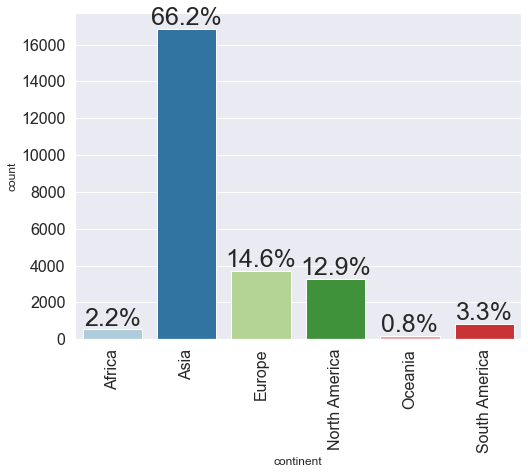

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(data, "continent", 1, perc=True)

- 2.2% of the employees are from Africa
- 66.2% of the employees are from Asia
- 14.6% of the employees are from Europe
- 12.9% of the employees are from North America
- 0.8% of the employees are from Oceania
- 3.3% of the employees are from South America

### Observation on education_of_employee

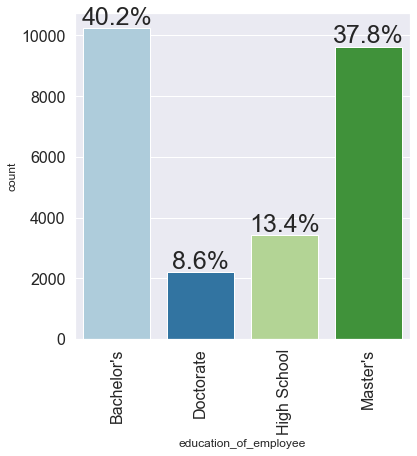

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(data, "education_of_employee", 1, perc=True)

- 40.2% of the employees have a Bachelor's Degree
- 8.6% of the employees have a Doctorate Degree
- 13.4% of the employees have a High School Degree
- 37.8% of the employees have a Master's Degree

### Observation on has_job_experience

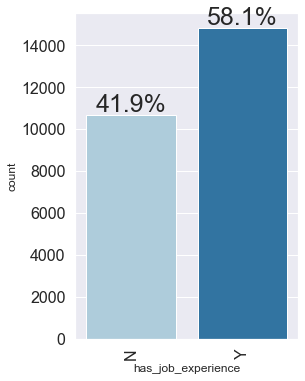

<IPython.core.display.Javascript object>

In [17]:
labeled_barplot(data, "has_job_experience", 1, perc=True)

- 41.9% of the employees do not have job experience
- 58.1% of the employees do have job experience

### Observation on requires_job_training

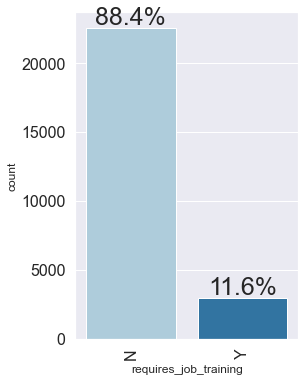

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(data, "requires_job_training", 1, perc=True)

- 88.4% of the employees do not require job training
- 11.6% of the employees do require job training

### Observation on no_of_employees

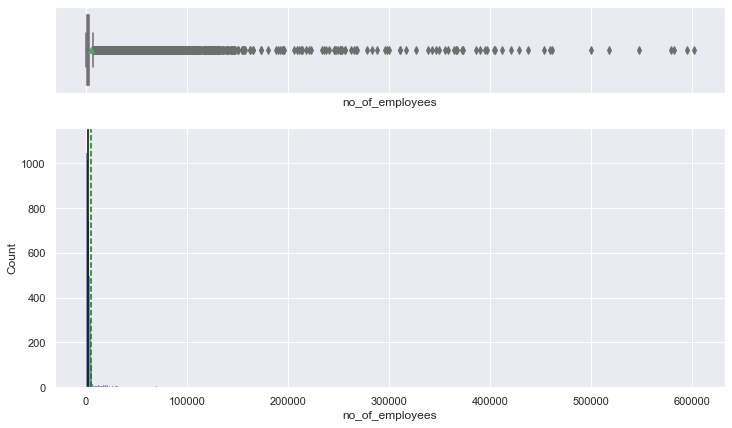

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data, "no_of_employees")

- The Median no_of_employees is 2,109, the lowest no_of_employees is -26 and the highest no_of_employees is 602,069
- The IQR for the no_of_employees is between 1,022 and 3,504 with a mean of 5,667
- We will later group all the negitive employees the employer has in the company to just zero. (A startup company)
- There is outliers in no_of_employees

### Observation on yr_of_estab

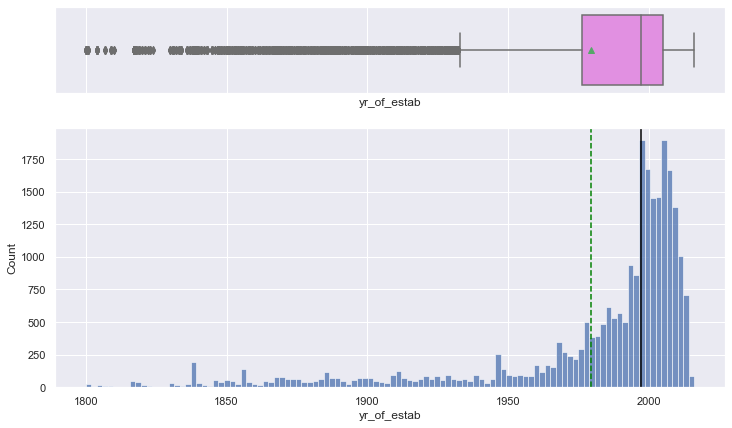

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data, "yr_of_estab")

- The Median year in which the employer's company was established is 1997, the oldest is 1800 and the newest is 2016
- The IQR for the year in which the employer's company was established is between 1976 and 2005 with a mean of 1979
- There is outliers in the year in which the employer's company was established

### Observation on region_of_employment

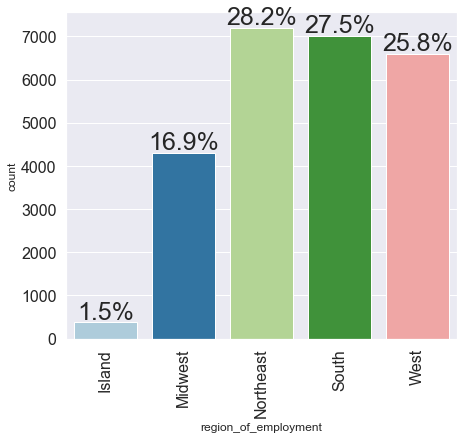

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(data, "region_of_employment", 1, perc=True)

- 1.5% of the foreign worker's intended region of employment in the US is an Island.
- 16.6% of the foreign worker's intended region of employment in the US is the Midwest. 
- 28.2% of the foreign worker's intended region of employment in the US is the Northeast.
- 27.5% of the foreign worker's intended region of employment in the US is the South.
- 25.8% of the foreign worker's intended region of employment in the US is the West.

### Observation on prevailing_wage

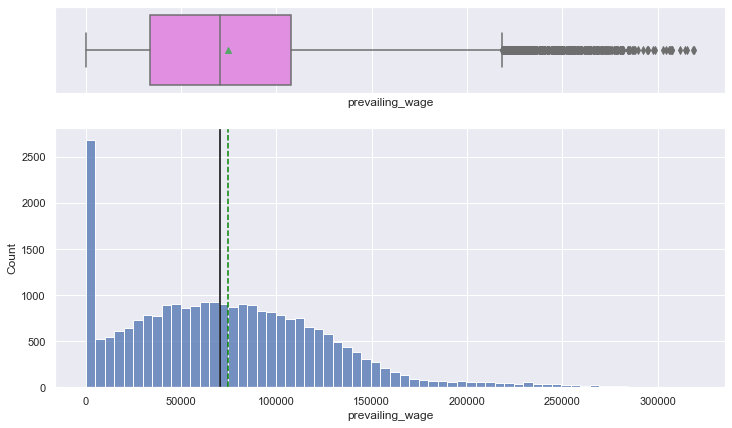

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(data, "prevailing_wage")

- The Median wage paid in a specific occupation is 70,308.  The lowest wage is 2 and the highest wage is 319,210.
- The IQR for the wage paid in a specific occupation is between 34,015 and 107,736 with a mean wage of 74,456.
- There is outliers in the wage paid for a specific occupation.

### Observation on unit_of_wage

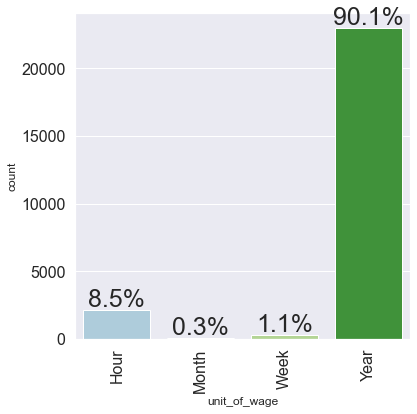

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "unit_of_wage", 1, perc=True)

- 8.5% of the unit of wage paid is Hourly.
- 0.3% of the unit of wage paid is Monthly.
- 1.1% of the unit of wage paid is Weekly.
- 90.1% of the unit of wage paid is Yearly.

### Observation on full_time_position

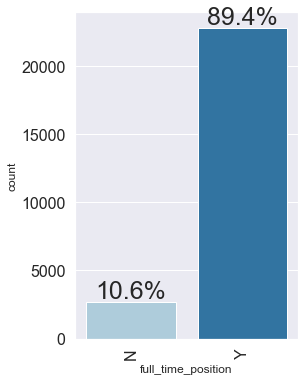

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(data, "full_time_position", 1, perc=True)

- 10.6% of the position of work by employer is not full-time.
- 89.4% of the position of work by employer is full-time.

### Observation on case_status

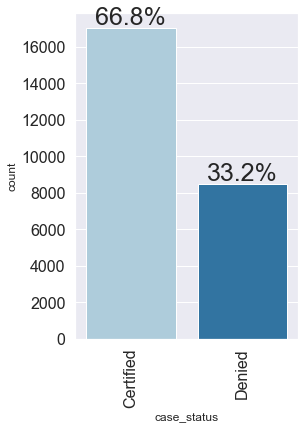

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(data, "case_status", 1, perc=True)

- 66.8% of the employee's Visa was Certified.
- 33.2% of the employees's Visa was Denied.

## Bivariate Analysis

In [26]:
# function to plot boxplot chart
def boxplot_chart(data_chart, x_axis, y_axis, x_rotation=0, figuresize=12):
    plt.figure(figsize=(15, 7))
    sns.boxplot(data=data_chart, x=x_axis, y=y_axis, palette="PuBu")
    plt.xticks(rotation=x_rotation, fontsize=figuresize)
    plt.show()


# function to plot stacked barplot chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

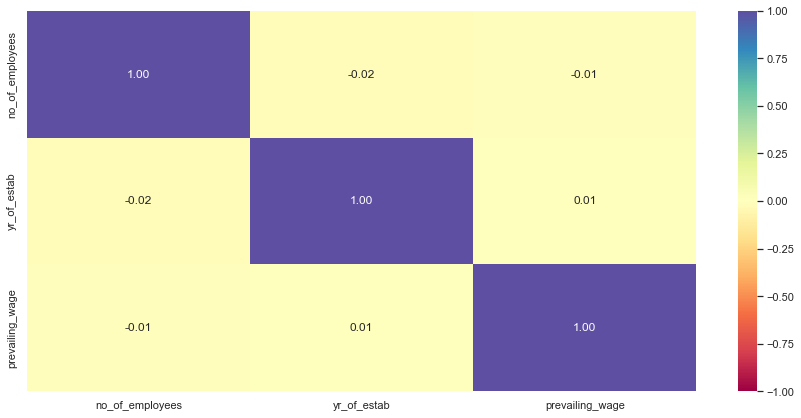

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- There is no correlation between the independent variables.

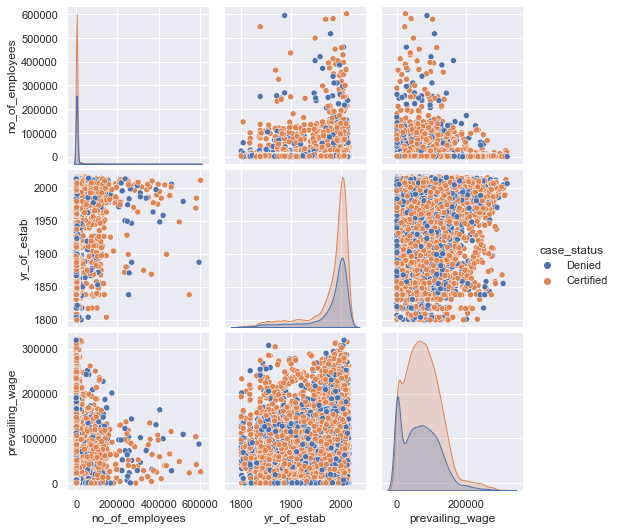

<IPython.core.display.Javascript object>

In [28]:
sns.pairplot(data=data, hue="case_status", diag_kind="kde")
plt.show()

- Most of the high paying wages are from employers with lower number of employees.
- Company's with 1990 or later year established are more likely to have greater number of employees.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


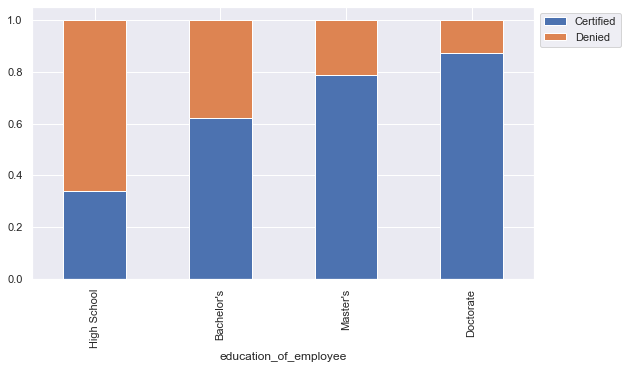

<IPython.core.display.Javascript object>

In [29]:
stacked_barplot(data, "education_of_employee", "case_status")

- Education of employee does play a role in Visa certification.
- The higher the education level, the greater chance of Visa certification.

### 2. How does the visa status vary across different continents and regions? 

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


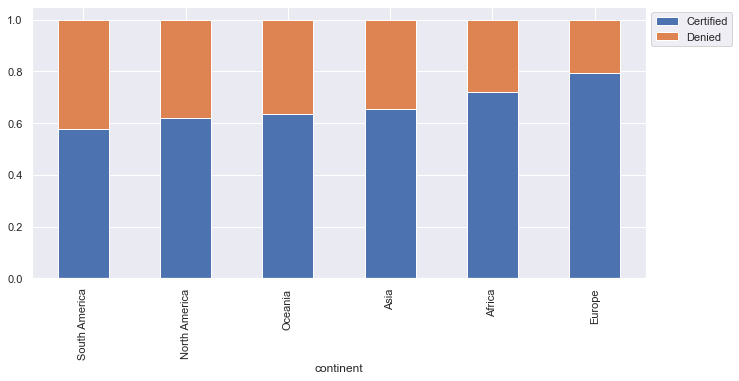

<IPython.core.display.Javascript object>

In [30]:
stacked_barplot(data, "continent", "case_status")

- The lowest percentage of Visa certifications come from South and North America at around 60% of employees
- The highest percentage of Visa certifications come from Europe at around 80% of employees.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


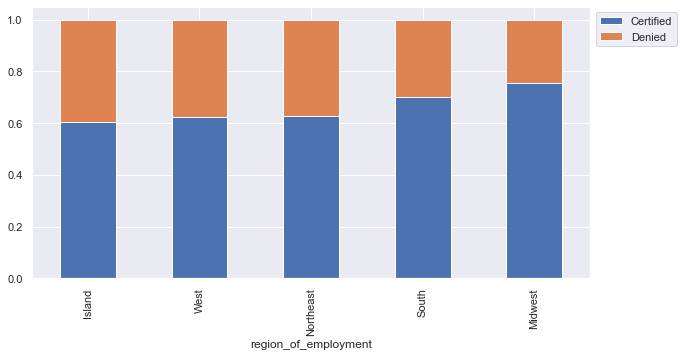

<IPython.core.display.Javascript object>

In [31]:
stacked_barplot(data, "region_of_employment", "case_status")

- The lowest region of employment for Visa certifications come from Islands and the West at around 60% of employees.
- The highest region of employment for Visa certifications come from Midwest at around 75% of employees.

### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


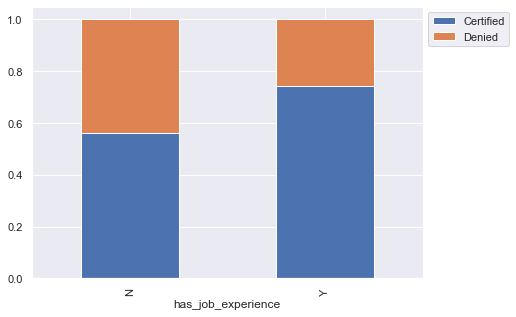

<IPython.core.display.Javascript object>

In [32]:
stacked_barplot(data, "has_job_experience", "case_status")

- Employees with job experience does influence Visa certifications.
- Employees with no job experience has around 58% chance of getting a Visa certification.
- Employees with job experience has around 78% chance of getting a Visa certification.

### 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


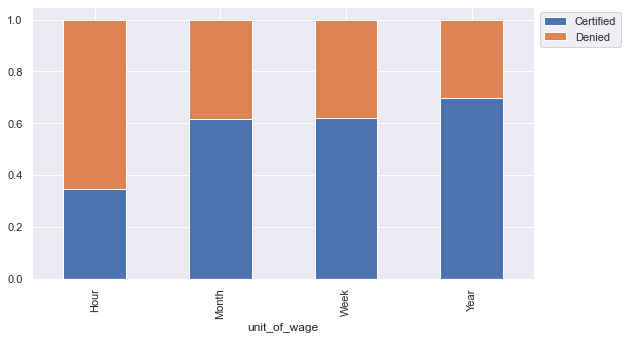

<IPython.core.display.Javascript object>

In [33]:
stacked_barplot(data, "unit_of_wage", "case_status")

- Unit of wage does influence Visa certifications.
- Yearly unit of wage is most likely to be certified for a Visa.
- Hourly unit of wage is least likely to be certified for a Visa.

### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

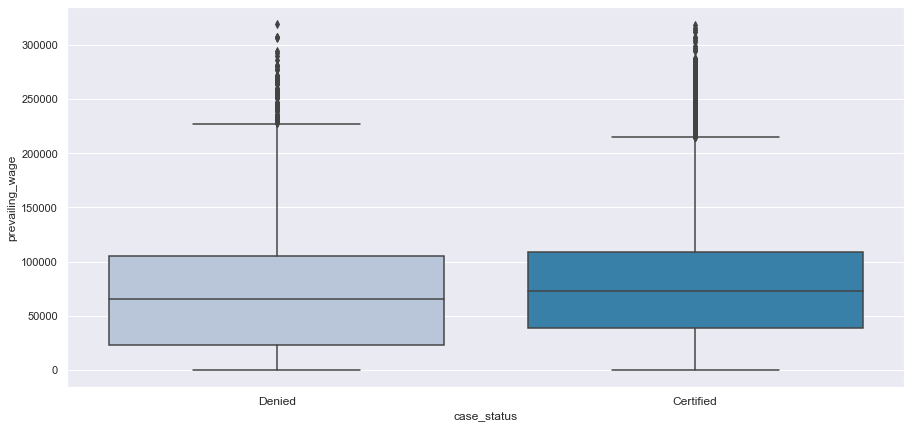

<IPython.core.display.Javascript object>

In [34]:
boxplot_chart(data, "case_status", "prevailing_wage")

- The employees with slightly higher prevailing wage has a greater chance to be certified for a Visa.

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


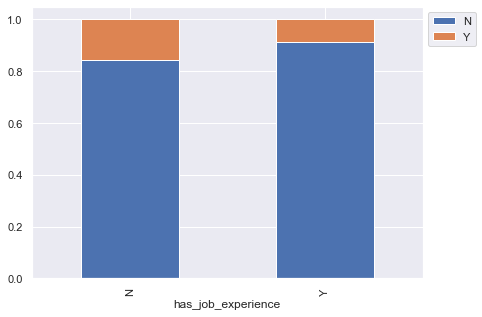

<IPython.core.display.Javascript object>

In [35]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

- The employees with prior job experience also need slightly more job training compared to no prior job experience employees.

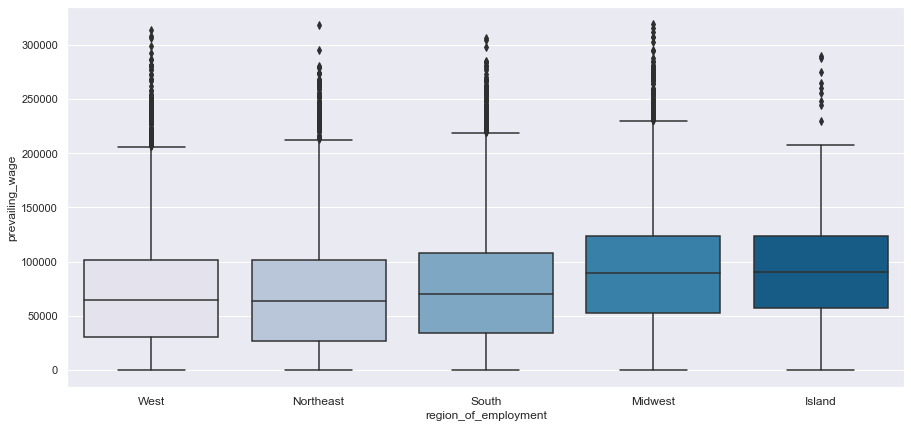

<IPython.core.display.Javascript object>

In [36]:
boxplot_chart(data, "region_of_employment", "prevailing_wage")

- Midwest and Island employees have the highest prevailing wages.
- West and Northeast employees have the lowest prevailing wages.

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


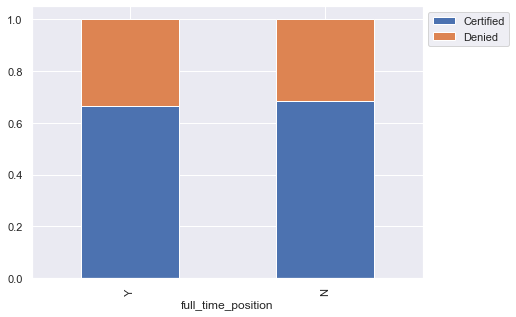

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(data, "full_time_position", "case_status")

- Full time or part time employment has no effect on Visa certifications.

# Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [38]:
# Create a copy of data and call it "df"
df = data.copy()

<IPython.core.display.Javascript object>

In [39]:
# Checking missing variables that we need to treat
df.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

In [40]:
# Create dummies for category columns in dataset
df = pd.get_dummies(
    df,
    columns=[
        "continent",
        "education_of_employee",
        "region_of_employment",
        "unit_of_wage",
    ],
    drop_first=True,
)
df.head()

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,case_status,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,N,N,14513,2007,592.2029,Y,Denied,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,Y,N,2412,2002,83425.6500,Y,Certified,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2,N,Y,44444,2008,122996.8600,Y,Denied,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,N,N,98,1897,83434.0300,Y,Denied,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,Y,N,1082,2005,149907.3900,Y,Certified,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


<IPython.core.display.Javascript object>

In [41]:
# Encoding the following columns with Y=1 and N=0
df["has_job_experience"] = df["has_job_experience"].apply(
    lambda x: 1 if x == "Y" else 0
)
df["requires_job_training"] = df["requires_job_training"].apply(
    lambda x: 1 if x == "Y" else 0
)
df["full_time_position"] = df["full_time_position"].apply(
    lambda x: 1 if x == "Y" else 0
)
# Encoding case_status column with Certified=1 and Denied=0
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)
df.head()

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,case_status,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0,0,14513,2007,592.2029,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1,0,2412,2002,83425.6500,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2,0,1,44444,2008,122996.8600,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,98,1897,83434.0300,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,1,0,1082,2005,149907.3900,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


<IPython.core.display.Javascript object>

In [42]:
# Information on updated dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   has_job_experience                 25480 non-null  int64  
 1   requires_job_training              25480 non-null  int64  
 2   no_of_employees                    25480 non-null  int64  
 3   yr_of_estab                        25480 non-null  int64  
 4   prevailing_wage                    25480 non-null  float64
 5   full_time_position                 25480 non-null  int64  
 6   case_status                        25480 non-null  int64  
 7   continent_Asia                     25480 non-null  uint8  
 8   continent_Europe                   25480 non-null  uint8  
 9   continent_North America            25480 non-null  uint8  
 10  continent_Oceania                  25480 non-null  uint8  
 11  continent_South America            25480 non-null  uin

<IPython.core.display.Javascript object>

## Split Data

In [43]:
# Split into X=Predictor and Y=Predicted
X = df.drop("case_status", axis=1)
Y = df["case_status"]

<IPython.core.display.Javascript object>

In [44]:
# 70% Training and 30% Testing split on dataset
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [45]:
# Checking the Split on dataset
print("{0:0.1f}% data is in training set".format((len(x_train) / len(df.index)) * 100))
print("{0:0.1f}% data is in test set".format((len(x_test) / len(df.index)) * 100))

70.0% data is in training set
30.0% data is in test set


<IPython.core.display.Javascript object>

In [46]:
# Checking class balance for whole data, train set and test set with stratify=Y
print("Target value ratio in whole Y")
print(Y.value_counts(1))
print("*" * 50)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 50)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 50)

Target value ratio in whole Y
1    0.667896
0    0.332104
Name: case_status, dtype: float64
**************************************************
Target value ratio in y_train
1    0.667919
0    0.332081
Name: case_status, dtype: float64
**************************************************
Target value ratio in y_test
1    0.667844
0    0.332156
Name: case_status, dtype: float64
**************************************************


<IPython.core.display.Javascript object>

# EDA

- It is a good idea to explore the data once again after manipulating it.

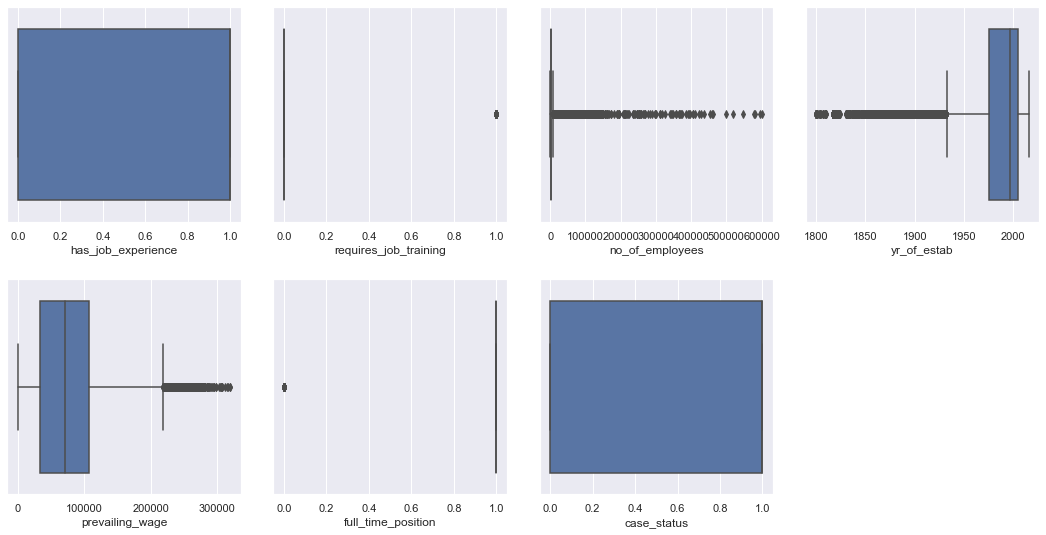

<IPython.core.display.Javascript object>

In [47]:
# EDA after manipulating the datset
num_cols = df.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status and dummy variables
del num_cols[7:]

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- **No change after manipulating dataset for no_of_employees (except for negative numbers), yr_of_estab, and prevailing_wage.**
- **The columns has_job_experience, requires_job_training, full_time_postition, and case_status have been encoded for modeling.**

# Building bagging and boosting models

In [48]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Decision Tree Model

In [140]:
# Creating the Decision Tree Model
dtree = DecisionTreeClassifier(
    class_weight="balanced", criterion="gini", random_state=1
)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

### Checking Decision Tree model performance on training dataset

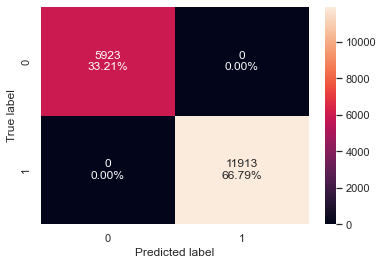

<IPython.core.display.Javascript object>

In [141]:
# Showing the confusion matrix on the Decision Tree train dataset
confusion_matrix_sklearn(dtree, x_train, y_train)

In [142]:
# Show model performance on the Decision Tree training dataset
dtree_model_train_perf = model_performance_classification_sklearn(
    dtree, x_train, y_train
)
dtree_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

### Checking Decision Tree model performance on test dataset

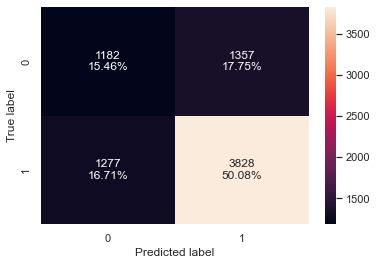

<IPython.core.display.Javascript object>

In [143]:
# Showing the confusion matrix on the Decision Tree test dataset
confusion_matrix_sklearn(dtree, x_test, y_test)

In [144]:
# Show model performance on the Decision Tree test dataset
dtree_model_test_perf = model_performance_classification_sklearn(dtree, x_test, y_test)
dtree_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.655416,0.749853,0.738284,0.744023


<IPython.core.display.Javascript object>

- **Decision Tree is overfitting on the training dataset.  F1 Score can be used as the metric for evaluation of our model, greater the F1 score the higher the chances of minimizing False Negatives and False Positives.**

## Bagging Classifier Model

In [54]:
# create the Bagging Classifier model
bagging = BaggingClassifier(random_state=1)
bagging.fit(x_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking Bagging Classifier model performance on training dataset

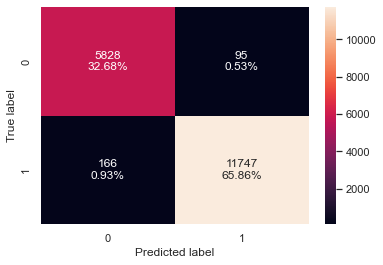

<IPython.core.display.Javascript object>

In [55]:
# Showing the confusion matrix on the Bagging train dataset
confusion_matrix_sklearn(bagging, x_train, y_train)

In [56]:
# Show model performance on the Bagging training dataset
bagging_model_train_perf = model_performance_classification_sklearn(
    bagging, x_train, y_train
)
bagging_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985367,0.986066,0.991978,0.989013


<IPython.core.display.Javascript object>

### Checking Bagging Classifier model performance on test dataset

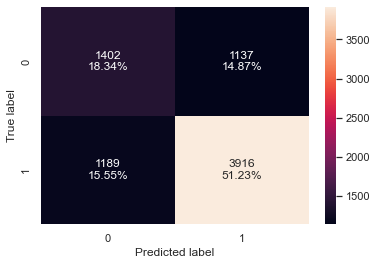

<IPython.core.display.Javascript object>

In [57]:
# Showing the confusion matrix on the Bagging test dataset
confusion_matrix_sklearn(bagging, x_test, y_test)

In [58]:
# Show model performance on the Bagging test dataset
bagging_model_test_perf = model_performance_classification_sklearn(
    bagging, x_test, y_test
)
bagging_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.695709,0.767091,0.774985,0.771018


<IPython.core.display.Javascript object>

- **Bagging classifier is overfitting the training set.  Bagging Classifier is performing a little better on the test set in terms of F1 score compared to the Decision Tree Model.  F1 Score can be used as the metric for evaluation of our model, greater the F1 score the higher the chances of minimizing False Negatives and False Positives.**

## Random Forest Model

In [59]:
# create the Random Forest model
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking Random Forest model performance on training dataset

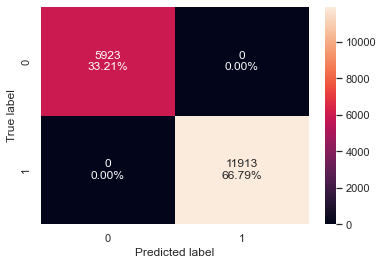

<IPython.core.display.Javascript object>

In [60]:
# Showing the confusion matrix on the Random Forest train dataset
confusion_matrix_sklearn(rf, x_train, y_train)

In [61]:
# Show model performance on the Random Forest training dataset
rf_model_train_perf = model_performance_classification_sklearn(rf, x_train, y_train)
rf_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

### Checking Random Forest model performance on test dataset

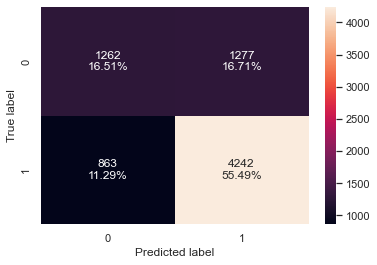

<IPython.core.display.Javascript object>

In [62]:
# Showing the confusion matrix on the Random Forest test dataset
confusion_matrix_sklearn(rf, x_test, y_test)

In [63]:
# Show model performance on the Random Forest test dataset
rf_model_test_perf = model_performance_classification_sklearn(rf, x_test, y_test)
rf_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.720042,0.83095,0.768618,0.798569


<IPython.core.display.Javascript object>

- **Random Forest model is overfitting the training set.  Random Forest model is performing better on the test set compared to  both the Decision Tree and Bagging Classifier models.  This is our best model so far.  F1 Score can be used as the metric for evaluation of our model, greater the F1 score the higher the chances of minimizing False Negatives and False Positives.**

## AdaBoost Model

In [84]:
# Creating the AdaBoost Model
abc = AdaBoostClassifier(random_state=1)
abc.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking AdaBoost model performance on training dataset

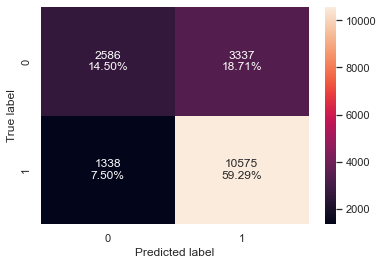

<IPython.core.display.Javascript object>

In [85]:
# Showing the confusion matrix on the AdaBoost train dataset
confusion_matrix_sklearn(abc, x_train, y_train)

In [86]:
# Show model performance on the AdaBoost train dataset
abc_model_train_perf = model_performance_classification_sklearn(abc, x_train, y_train)
abc_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.73789,0.887686,0.760135,0.818974


<IPython.core.display.Javascript object>

### Checking AdaBoost model performance on test dataset

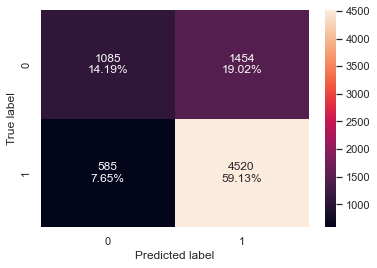

<IPython.core.display.Javascript object>

In [87]:
# Showing the confusion matrix on the AdaBoost test dataset
confusion_matrix_sklearn(abc, x_test, y_test)

In [88]:
# Show model performance on the AdaBoost test dataset
abc_model_test_perf = model_performance_classification_sklearn(abc, x_test, y_test)
abc_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.733255,0.885406,0.756612,0.815958


<IPython.core.display.Javascript object>

- **AdaBoost model is not overfitting the training set.  AdaBoost model is performing better on the test set compared to all the models (Decision Tree, Bagging Classifier, Random Forest).  This is our best model so far.  F1 Score can be used as the metric for evaluation of our model, greater the F1 score the higher the chances of minimizing False Negatives and False Positives.**

## GradientBoost Model

In [89]:
# Creating the GradientBoost Model
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking GradientBoost model performance on training dataset

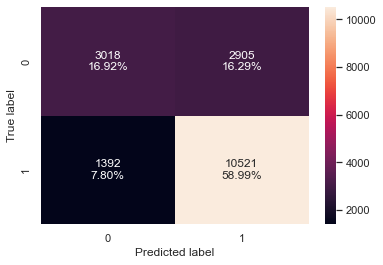

<IPython.core.display.Javascript object>

In [90]:
# Showing the confusion matrix on the GradientBoost train dataset
confusion_matrix_sklearn(gbc, x_train, y_train)

In [91]:
# Show model performance on the GradientBoost train dataset
gbc_model_train_perf = model_performance_classification_sklearn(gbc, x_train, y_train)
gbc_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.759083,0.883153,0.783629,0.83042


<IPython.core.display.Javascript object>

### Checking GradientBoost model performance on test dataset

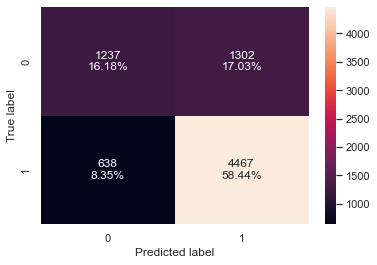

<IPython.core.display.Javascript object>

In [92]:
# Showing the confusion matrix on the GradientBoost test dataset
confusion_matrix_sklearn(gbc, x_test, y_test)

In [93]:
# Show model performance on the GradientBoost test dataset
gbc_model_test_perf = model_performance_classification_sklearn(gbc, x_test, y_test)
gbc_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.746206,0.875024,0.774311,0.821593


<IPython.core.display.Javascript object>

- **GradientBoost model is not overfitting the training set.  GradientBoost model is performing better on the test set compared to the AdaBoost model in terms of F1 score and Accuracy.  This is our best model so far!  F1 Score can be used as the metric for evaluation of our model, greater the F1 score the higher the chances of minimizing False Negatives and False Positives.**

## XGBoost Model

In [94]:
# Creating the XGBoost Model
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

### Checking XGBoost model performance on training dataset

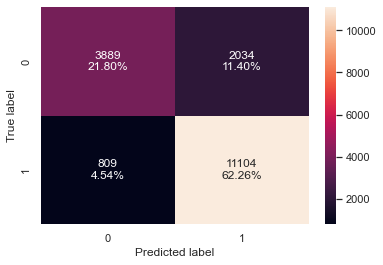

<IPython.core.display.Javascript object>

In [95]:
# Showing the confusion matrix on the XGBoost train dataset
confusion_matrix_sklearn(xgb, x_train, y_train)

In [96]:
# Show model performance on the XGBoost train dataset
xgb_model_train_perf = model_performance_classification_sklearn(xgb, x_train, y_train)
xgb_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.840603,0.932091,0.845182,0.886512


<IPython.core.display.Javascript object>

### Checking XGBoost model performance on test dataset

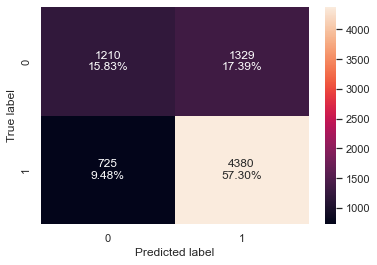

<IPython.core.display.Javascript object>

In [97]:
# Showing the confusion matrix on the XGBoost test dataset
confusion_matrix_sklearn(xgb, x_test, y_test)

In [98]:
# Show model performance on the XGBoost test dataset
xgb_model_test_perf = model_performance_classification_sklearn(xgb, x_test, y_test)
xgb_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.731293,0.857982,0.76721,0.810061


<IPython.core.display.Javascript object>

- **XGBoost model is overfitting the training set.  XGBoost model is performing worse on the test set compared to the GradientBoost model on all metric scores.  F1 Score can be used as the metric for evaluation of our model, greater the F1 score the higher the chances of minimizing False Negatives and False Positives.**

#  Will tuning the hyperparameters improve the model performance?

## Tuning Decision Tree

In [145]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 30),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15, None],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(x_train, y_train)

<IPython.core.display.Javascript object>

In [65]:
# getting the best estimator
dtree_tuned = grid_obj.best_estimator_
dtree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2, min_impurity_decrease=0.1,
                       random_state=1)

<IPython.core.display.Javascript object>

### Checking Tuned Decision Tree model performance on training dataset

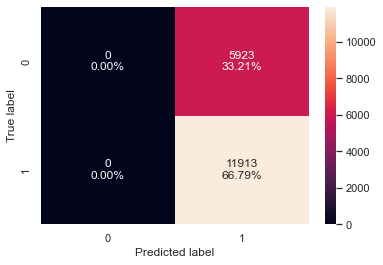

<IPython.core.display.Javascript object>

In [146]:
# Showing the confusion matrix on the Tuned Decision Tree train dataset
confusion_matrix_sklearn(dtree_tuned, x_train, y_train)

In [147]:
# Show model performance on the Tuned Decision Tree train dataset
dtree_tuned_model_train_perf = model_performance_classification_sklearn(
    dtree_tuned, x_train, y_train
)
dtree_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.667919,1.0,0.667919,0.800901


<IPython.core.display.Javascript object>

### Checking Tuned Decision Tree model performance on test dataset

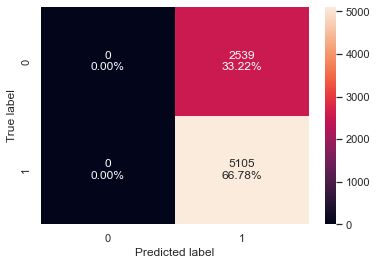

<IPython.core.display.Javascript object>

In [148]:
# Showing the confusion matrix on the Tuned Decision Tree test dataset
confusion_matrix_sklearn(dtree_tuned, x_test, y_test)

In [149]:
# Show model performance on the Tuned Decision Tree test dataset
dtree_tuned_model_test_perf = model_performance_classification_sklearn(
    dtree_tuned, x_test, y_test
)
dtree_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.667844,1.0,0.667844,0.800847


<IPython.core.display.Javascript object>

- **Tuned Decision Tree is not overfitting on the training set now and recall is good but Precision has decreased.  The Tuned Decision Tree is performing better than just default Decision Tree because of F1 score.  F1 Score can be used as the metric for evaluation of our model, greater the F1 score the higher the chances of minimizing False Negatives and False Positives.**

## Tuning Bagging Classifier

In [156]:
# grid search for bagging classifier
param_grid = {
    "n_estimators": [25, 50, 95, 101, 105],
    "max_features": [0.7, 0.8, 0.9, 1],
    "max_samples": [0.7, 0.9],
}

grid = GridSearchCV(
    BaggingClassifier(random_state=1, bootstrap=True),
    param_grid=param_grid,
    scoring=metrics.f1_score,
    cv=5,
)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'max_features': [0.7, 0.8, 0.9, 1],
                         'max_samples': [0.7, 0.9],
                         'n_estimators': [25, 50, 95, 101, 105]},
             scoring=<function f1_score at 0x000002641DF3CDC0>)

<IPython.core.display.Javascript object>

In [157]:
# getting the best estimator
bagging_tuned = grid.best_estimator_
bagging_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=25,
                  random_state=1)

<IPython.core.display.Javascript object>

### Checking Tuned Bagging Classifier model performance on training dataset

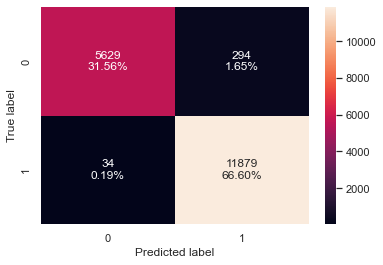

<IPython.core.display.Javascript object>

In [158]:
# Showing the confusion matrix on the Tuned Bagging train dataset
confusion_matrix_sklearn(bagging_tuned, x_train, y_train)

In [159]:
# Show model performance on the Tuned Bagging train dataset
bagging_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_tuned, x_train, y_train
)
bagging_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.98161,0.997146,0.975848,0.986382


<IPython.core.display.Javascript object>

### Checking Tuned Bagging Classifier model performance on test dataset

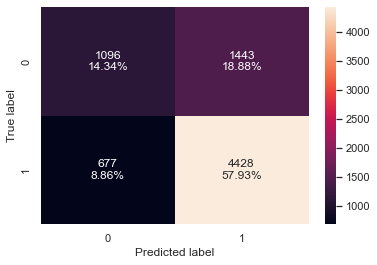

<IPython.core.display.Javascript object>

In [160]:
# Showing the confusion matrix on the Tuned Bagging test dataset
confusion_matrix_sklearn(bagging_tuned, x_test, y_test)

In [161]:
# Show model performance on the Tuned Bagging test dataset
bagging_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_tuned, x_test, y_test
)
bagging_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.722658,0.867385,0.754216,0.806851


<IPython.core.display.Javascript object>

- **Tuned Bagging Classifier is still overfitting on the training set.  The Tuned Bagging Classifier is performing better than just default Bagging Classifier.  F1 Score can be used as the metric for evaluation of our model, greater the F1 score the higher the chances of minimizing False Negatives and False Positives.**

## Tuning Random Forest

In [162]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [110, 251, 501],
    "min_samples_leaf": np.arange(1, 6, 1),
    "max_features": [0.7, 0.9, "sqrt", "log2"],
    "max_samples": [0.7, 0.9, None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=metrics.f1_score, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

<IPython.core.display.Javascript object>

In [163]:
# getting the best estimator
rf_tuned = grid_obj.best_estimator_
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_features=0.7, max_samples=0.7, n_estimators=110,
                       random_state=1)

<IPython.core.display.Javascript object>

### Checking Tuned Random Forest model performance on training dataset

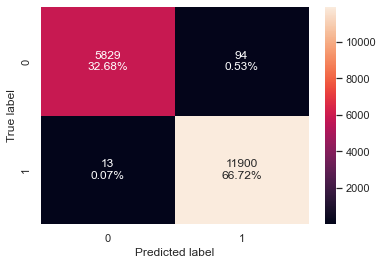

<IPython.core.display.Javascript object>

In [164]:
# Showing the confusion matrix on the Tuned Random Forest train dataset
confusion_matrix_sklearn(rf_tuned, x_train, y_train)

In [165]:
# Show model performance on the Tuned Random Forest train dataset
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, x_train, y_train
)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.994001,0.998909,0.992163,0.995524


<IPython.core.display.Javascript object>

### Checking Tuned Random Forest model performance on test dataset

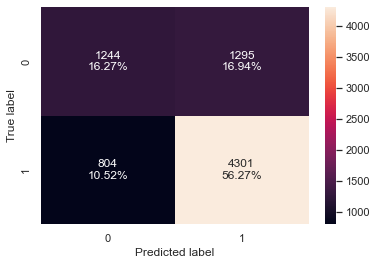

<IPython.core.display.Javascript object>

In [166]:
# Showing the confusion matrix on the Tuned Random Forest test dataset
confusion_matrix_sklearn(rf_tuned, x_test, y_test)

In [167]:
# Show model performance on the Tuned Random Forest test dataset
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, x_test, y_test
)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.725406,0.842507,0.768585,0.80385


<IPython.core.display.Javascript object>

- **Tuned Random Forest is still overfitting on the training set.  The Tuned Random Forest is performing better on all metric scores compared to just default Random Forest.  F1 Score can be used as the metric for evaluation of our model, greater the F1 score the higher the chances of minimizing False Negatives and False Positives.**

## Tuning AdaBoost Model

In [169]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=3, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 1.5, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

<IPython.core.display.Javascript object>

In [170]:
# getting the best estimator
abc_tuned = grid_obj.best_estimator_
abc_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, random_state=1)

<IPython.core.display.Javascript object>

### Checking Tuned AdaBoost Model performance on training dataset

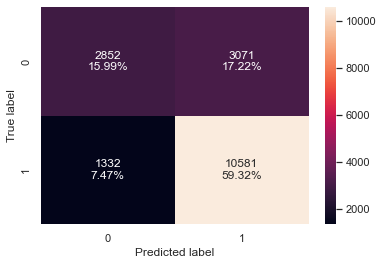

<IPython.core.display.Javascript object>

In [171]:
# Showing the confusion matrix on the Tuned AdaBoost train dataset
confusion_matrix_sklearn(abc_tuned, x_train, y_train)

In [172]:
# Show model performance on the Tuned AdaBoost train dataset
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, x_train, y_train
)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.75314,0.888189,0.775051,0.827772


<IPython.core.display.Javascript object>

### Checking Tuned AdaBoost Model performance on test dataset

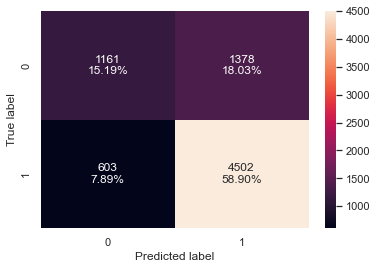

<IPython.core.display.Javascript object>

In [173]:
# Showing the confusion matrix on the Tuned AdaBoost test dataset
confusion_matrix_sklearn(abc_tuned, x_test, y_test)

In [174]:
# Show model performance on the Tuned AdaBoost test dataset
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, x_test, y_test
)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.740842,0.881881,0.765646,0.819663


<IPython.core.display.Javascript object>

- **Tuned AdaBoost model is not overfitting the training set same as default AdaBoost model.  The Tuned AdaBoost model is performing about the same as default AdaBoost model but Accuracy and F1 is slightly higher.  F1 Score can be used as the metric for evaluation of our model, greater the F1 score the higher the chances of minimizing False Negatives and False Positives.**

## Tuning Gradient Boost Model

In [175]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.05, 0.1, 0.2]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

<IPython.core.display.Javascript object>

In [176]:
# getting the best estimator
gbc_tuned = grid_obj.best_estimator_
gbc_tuned.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.9)

<IPython.core.display.Javascript object>

### Checking Tuned Gradient Boost Model performance on training dataset

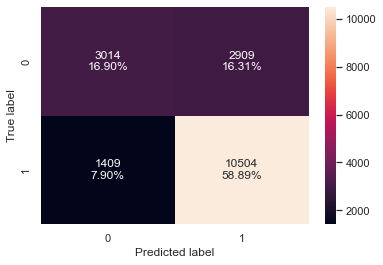

<IPython.core.display.Javascript object>

In [177]:
# Showing the confusion matrix on the Tuned Gradient Boost train dataset
confusion_matrix_sklearn(gbc_tuned, x_train, y_train)

In [178]:
# Show model performance on the Tuned Gradient Boost train dataset
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, x_train, y_train
)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.757905,0.881726,0.783121,0.829503


<IPython.core.display.Javascript object>

### Checking Tuned Gradient Boost Model performance on test dataset

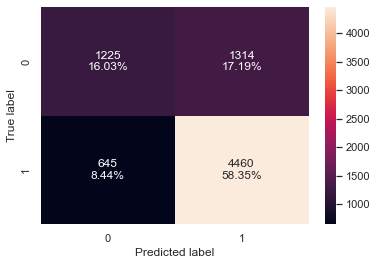

<IPython.core.display.Javascript object>

In [179]:
# Showing the confusion matrix on the Tuned Gradient Boost test dataset
confusion_matrix_sklearn(gbc_tuned, x_test, y_test)

In [180]:
# Show model performance on the Tuned Gradient Boost test dataset
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, x_test, y_test
)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743721,0.873653,0.772428,0.819928


<IPython.core.display.Javascript object>

- **Tuned GradientBoost model is not overfitting the training set the same as default GradientBoost model.  Tuned GradientBoost model is performing about the same as default GradientBoost model.  F1 Score can be used as the metric for evaluation of our model, greater the F1 score the higher the chances of minimizing False Negatives and False Positives.**

## Tuning XGBoost Model

In [181]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10, 30, 50],
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": [0.05, 0.1, 0.2],
    "gamma": [3, 5],
    "colsample_bytree": [0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

<IPython.core.display.Javascript object>

In [182]:
# getting the best estimator
xgb_tuned = grid_obj.best_estimator_
xgb_tuned.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

<IPython.core.display.Javascript object>

### Checking Tuned XGBoost Model performance on training dataset

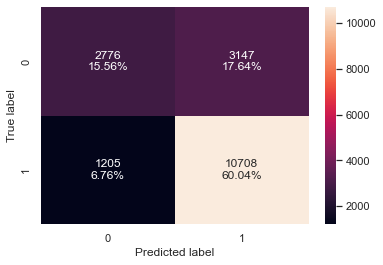

<IPython.core.display.Javascript object>

In [183]:
# Showing the confusion matrix on the Tuned XGBoost train dataset
confusion_matrix_sklearn(xgb_tuned, x_train, y_train)

In [184]:
# Show model performance on the Tuned XGBoost train dataset
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, x_train, y_train
)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.755999,0.89885,0.772862,0.831108


<IPython.core.display.Javascript object>

### Checking Tuned XGBoost Model performance on test dataset

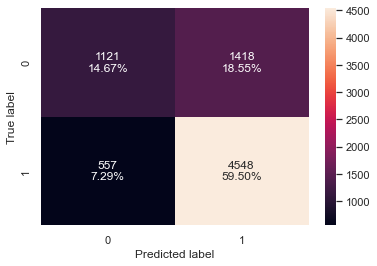

<IPython.core.display.Javascript object>

In [186]:
# Showing the confusion matrix on the Tuned XGBoost test dataset
confusion_matrix_sklearn(xgb_tuned, x_test, y_test)

In [187]:
# Show model performance on the Tuned XGBoost test dataset
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, x_test, y_test
)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.741627,0.890891,0.76232,0.821606


<IPython.core.display.Javascript object>

- **Tuned XGBoost model is not overfitting the training set now.  Tuned XGBoost model is performing much better compared to just default XGBoost model.  This is probably our best model!  F1 and Accuracy is really good.  F1 Score can be used as the metric for evaluation of our model, greater the F1 score the higher the chances of minimizing False Negatives and False Positives.**

## Stacking Classifier using Tuned Models

In [188]:
# Creating the Stacking Classifier using Tuned Models
estimators = [
    ("Random Forest", rf_tuned),
    ("Adaptive Boosting", abc_tuned),
    ("Gradient Boosting", gbc_tuned),
]
final_estimator = xgb_tuned
stacking_classifier_tuned = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)
stacking_classifier_tuned.fit(x_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_features=0.7,
                                                       max_samples=0.7,
                                                       n_estimators=110,
                                                       random_state=1)),
                               ('Adaptive Boosting',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=0.1,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           m...
                                                 eval_metric='logloss', gamma=5,
                                                 gpu_id=-1,
                                                 grow_policy='depthwise',
                                                 importance_type=None,
                                                 interaction_constraints='',
                                                 learning_rate=0.05,
                                                 max_bin=256,
                                                 max_cat_to_onehot=4,
                                                 max_delta_step=0, max_depth=6,
                                                 max_leaves=0,
                                                 min_child_weight=1,
                                                 missing=nan,
                                                 monotone_constraints='()',
                                                 n_estimators=30, n_jobs=0,
                                                 num_parallel_tree=1,
                                                 predictor='auto',
                                                 random_state=1, reg_alpha=0,
                                                 reg_lambda=1, ...))

<IPython.core.display.Javascript object>

### Checking Stacking Classifier performance on training dataset  (using tuned models)

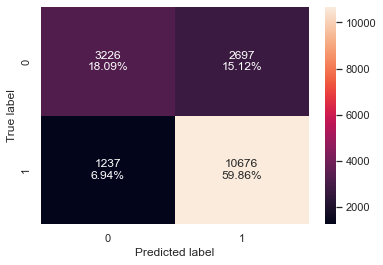

<IPython.core.display.Javascript object>

In [189]:
# Showing the confusion matrix on the Stacking Classifier train dataset (using tuned models)
confusion_matrix_sklearn(stacking_classifier_tuned, x_train, y_train)

In [190]:
# Show model performance on the Stacking Classifier train dataset (using tuned models)
stacking_classifier_tuned_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier_tuned, x_train, y_train
)
stacking_classifier_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.779435,0.896164,0.798325,0.84442


<IPython.core.display.Javascript object>

### Checking Stacking Classifier performance on test dataset  (using tuned models)

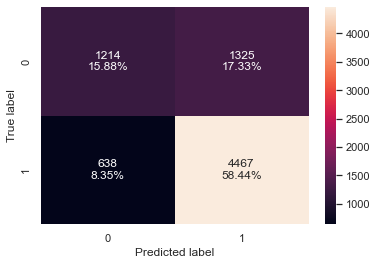

<IPython.core.display.Javascript object>

In [191]:
# Showing the confusion matrix on the Stacking Classifier test dataset (using tuned models)
confusion_matrix_sklearn(stacking_classifier_tuned, x_test, y_test)

In [192]:
# Show model performance on the Stacking Classifier test dataset (using tuned models)
stacking_classifier_tuned_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier_tuned, x_test, y_test
)
stacking_classifier_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743197,0.875024,0.771236,0.819859


<IPython.core.display.Javascript object>

- **The Stacking Classifier model is slightly overfitting the training dataset.  The performance of the Stacking Classifier is about the same as just the Tune XGBoost model.  F1 Score can be used as the metric for evaluation of our model, greater the F1 score the higher the chances of minimizing False Negatives and False Positives.**

# Model Performance Comparison and Conclusions

In [193]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        bagging_model_train_perf.T,
        rf_model_train_perf.T,
        abc_model_train_perf.T,
        gbc_model_train_perf.T,
        xgb_model_train_perf.T,
        dtree_tuned_model_train_perf.T,
        bagging_tuned_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Adaptive Boosting",
    "Gradient Boosting",
    "Extreme Gradient Boosting",
    "Tuned Decision Tree",
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned Adaptive Boosting",
    "Tuned Gradient Boosting",
    "Tuned Extreme Gradient Boosting",
    "Stacking Classifier using Tuned Models",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Bagging Classifier,Random Forest Classifier,Adaptive Boosting,Gradient Boosting,Extreme Gradient Boosting,Tuned Decision Tree,Tuned Bagging Classifier,Tuned Random Forest,Tuned Adaptive Boosting,Tuned Gradient Boosting,Tuned Extreme Gradient Boosting,Stacking Classifier using Tuned Models
Accuracy,1.0,0.985367,1.0,0.737890,0.759083,0.840603,0.667919,0.981610,0.994001,0.753140,0.757905,0.755999,0.779435
Recall,1.0,0.986066,1.0,0.887686,0.883153,0.932091,1.000000,0.997146,0.998909,0.888189,0.881726,0.898850,0.896164
Precision,1.0,0.991978,1.0,0.760135,0.783629,0.845182,0.667919,0.975848,0.992163,0.775051,0.783121,0.772862,0.798325
F1,1.0,0.989013,1.0,0.818974,0.830420,0.886512,0.800901,0.986382,0.995524,0.827772,0.829503,0.831108,0.844420


<IPython.core.display.Javascript object>

In [194]:
# Test performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        bagging_model_test_perf.T,
        rf_model_test_perf.T,
        abc_model_test_perf.T,
        gbc_model_test_perf.T,
        xgb_model_test_perf.T,
        dtree_tuned_model_test_perf.T,
        bagging_tuned_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_tuned_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Adaptive Boosting",
    "Gradient Boosting",
    "Extreme Gradient Boosting",
    "Tuned Decision Tree",
    "Tuned Bagging Classifier",
    "Tuned Random Forest",
    "Tuned Adaptive Boosting",
    "Tuned Gradient Boosting",
    "Tuned Extreme Gradient Boosting",
    "Stacking Classifier using Tuned Models",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree,Bagging Classifier,Random Forest Classifier,Adaptive Boosting,Gradient Boosting,Extreme Gradient Boosting,Tuned Decision Tree,Tuned Bagging Classifier,Tuned Random Forest,Tuned Adaptive Boosting,Tuned Gradient Boosting,Tuned Extreme Gradient Boosting,Stacking Classifier using Tuned Models
Accuracy,0.655416,0.695709,0.720042,0.733255,0.746206,0.731293,0.667844,0.722658,0.725406,0.740842,0.743721,0.741627,0.743197
Recall,0.749853,0.767091,0.830950,0.885406,0.875024,0.857982,1.000000,0.867385,0.842507,0.881881,0.873653,0.890891,0.875024
Precision,0.738284,0.774985,0.768618,0.756612,0.774311,0.767210,0.667844,0.754216,0.768585,0.765646,0.772428,0.762320,0.771236
F1,0.744023,0.771018,0.798569,0.815958,0.821593,0.810061,0.800847,0.806851,0.803850,0.819663,0.819928,0.821606,0.819859


<IPython.core.display.Javascript object>

- **The two best models are the Gradient Boosting and Tuned Extreme Gradient Boosting models.**
- **The model that I would choose is the Tuned Extreme Gradient Boosting for the business.**

### Feature Importance of Tuned XGBoost model

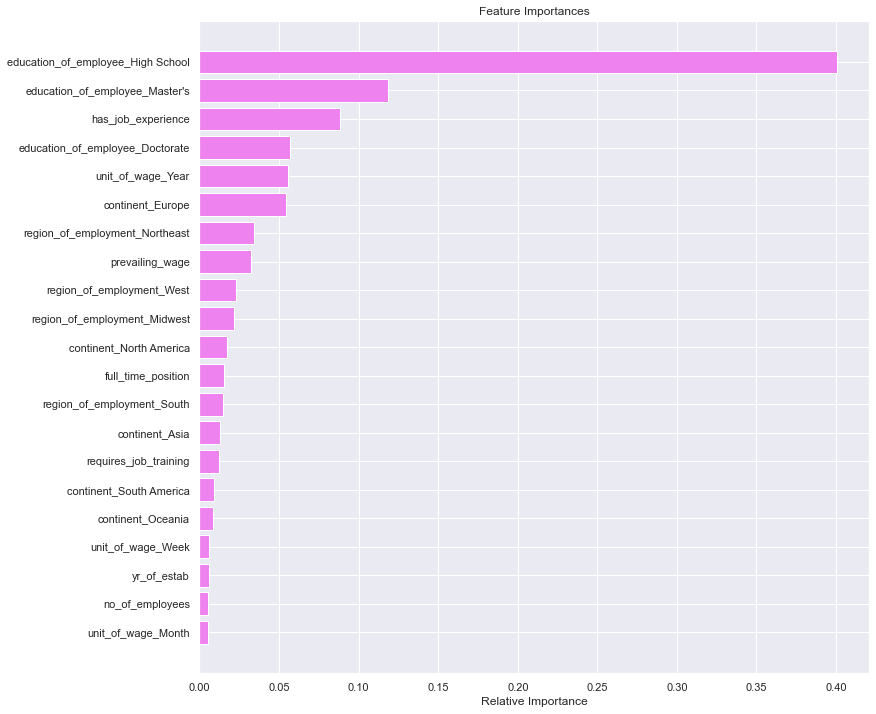

<IPython.core.display.Javascript object>

In [195]:
# Create chart showing the order of most important features for the Tuned Random Forest
feature_names = x_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Actionable Insights and Recommendations

- The business should use the Tuned Extreme Gradient Boosting model to prescreen all the employees and find just the best candidates for a Certified Visa.  This will save the business a lot of time getting all the employees Certified for a Visa.
- The five most important factors in Certified Visa is the education of the employee, employee has job experience, Yearly unit in wage, employee continent is Europe and region of employment is Northeast.  This should be taken in consideration when screening employees for Certified Visa.
- Midwest and Island employees have the highest prevailing wages and are more likely to be Certified for a Visa.
- Full time or part time employment has no effect on whether if employees will be Certified for a Visa.
- Yearly unit of wage is most likely to be certified for a Visa.
- The highest percentage of Visa certifications come from Europe.
- The higher the education level, the greater chance of Visa certification.
- The employees with prior job experience also need job training as well.
- Attracting talent from other countries requires offering competitive salaries, benefits, and opportunities for growth, and promoting the organization's culture and values.  This should be the focus of the business.
- Grow the business talent pool and discover new hiring hotspots that you hadn’t thought to look in before. (Oyster and VelocityGlobal.)
- Business hiring a foreign worker can be beneficial for a small business owner because they’re giving a valuable opportunity to help someone seeking employment in the USA and can be a rewarding and personally enriching experience for the employer.
- Employees perceptions on social media can make or break the business.  Fast growth depends on making your current and potential employees happy.
- Networking events allow you to connect with people in your industry, many of whom have unique perspectives and insights that can help you grow your business.
- Researching your competitors is one of the most important things the business can do to stay competitive now and in the future.
- The business should always look for ways to contribute meaningfully to causes that help make the world a better place. Whether the business donates to cancer research or support a nonprofit.  Employees and customers want to work/purchase with business like this.
- It is very important for the business to build its online presence and expand to the internet.